In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import bioframe
import numpy as np

import HMMC
import cooler
import matplotlib
import os

import seaborn as sns
figure_width = 5
matplotlib.rcParams['font.size'] = 10
saveFigs = True 
if saveFigs == True:
    figure_path = '../figs/figure4/'
    os.makedirs(figure_path, exist_ok=True)
    # to save inkscape-friendly svgs
    new_rc_params = {'text.usetex': False,
                     "svg.fonttype": 'none'}
    matplotlib.rcParams.update(new_rc_params)

In [2]:
gm_df = pd.read_csv('../annotations/GM12878_hg38_25kb.tsv', sep = '\t')
im_df = pd.read_csv('../annotations/IMR90_hg38_25kb.tsv', sep = '\t')

In [19]:
hmm3p = ['B', 'Mbb', 'M', 'Maa', 'A']
binary = ['B', 'A']

In [20]:
def comparison_matrix(track1, track2, segmentation1, segmentation2):
    mask = ~(track1.E1.isna() | track2.E1.isna())
    track1 = track1[mask]
    track2 = track2[mask]
    states1 = sorted(track1[segmentation1].unique())
    states2 = sorted(track2[segmentation2].unique())
    mat = np.zeros((len(states1), len(states2)), dtype=int)
    
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            mat[i,j] = sum((track1[segmentation1]==i) & (track2[segmentation2]==j))
            
    return mat

In [91]:
mat = comparison_matrix(gm_df, gm_df, 'binary', 'HMM3P')

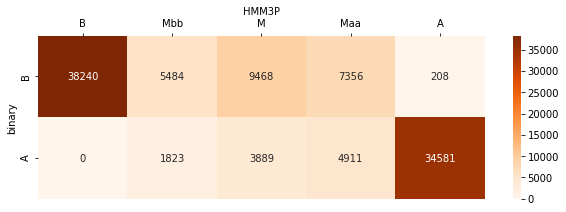

In [93]:
plt.figure(figsize=(10, 3))
sns.heatmap(mat,
           annot=True, cmap='Oranges',
           xticklabels=hmm3p, yticklabels=binary,
           fmt='g',)

plt.ylabel('binary')
plt.xlabel('HMM3P')

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

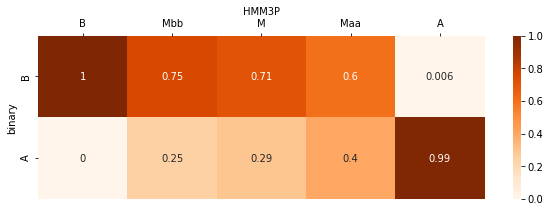

In [94]:
plt.figure(figsize=(10, 3))
sns.heatmap(mat/mat.sum(axis=0, keepdims=True),
           annot=True, cmap='Oranges',
           xticklabels=hmm3p, yticklabels=binary)
plt.ylabel('binary')
plt.xlabel('HMM3P')

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

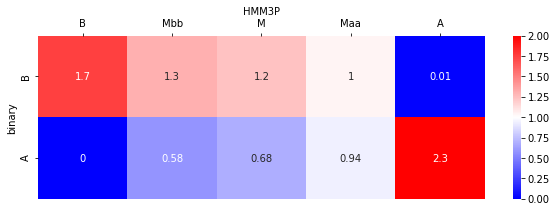

In [95]:
plt.figure(figsize=(10, 3))
expected = np.outer(mat.sum(axis=1), mat.sum(axis=0))/mat.sum()
sns.heatmap(mat/expected,
           annot=True, cmap='bwr',
           xticklabels=hmm3p, yticklabels=binary, vmin=0, vmax=2)
plt.ylabel('binary')
plt.xlabel('HMM3P')

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

In [98]:
mat = comparison_matrix(gm_df, im_df, 'HMM3P', 'HMM3P')

In [105]:
np.diag(mat).sum()/mat.sum()

0.5296330869465823

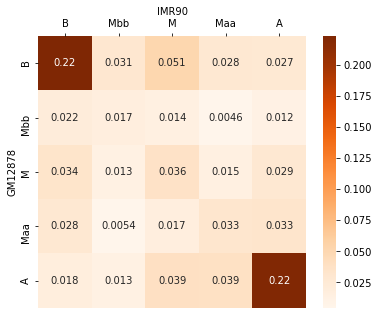

In [106]:
plt.figure(figsize=(6, 5))
sns.heatmap(mat/mat.sum(),
           annot=True, cmap='Oranges',
           xticklabels=hmm3p, yticklabels=hmm3p)


plt.ylabel('GM12878')
plt.xlabel('IMR90')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

if saveFigs:
    plt.savefig(figure_path+'GM12878_IMR90'+'.svg', bbox_inches='tight')

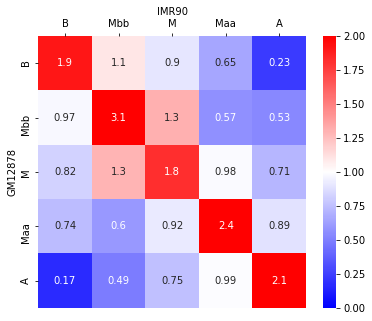

In [107]:
plt.figure(figsize=(6, 5))
expected = np.outer(mat.sum(axis=1), mat.sum(axis=0))/mat.sum()
sns.heatmap(mat/expected,
           annot=True, cmap='bwr',
           xticklabels=hmm3p, yticklabels=hmm3p, vmin=0, vmax=2)
plt.ylabel('GM12878')
plt.xlabel('IMR90')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

if saveFigs:
    plt.savefig(figure_path+'GM12878_IMR90_enriched'+'.svg', bbox_inches='tight')

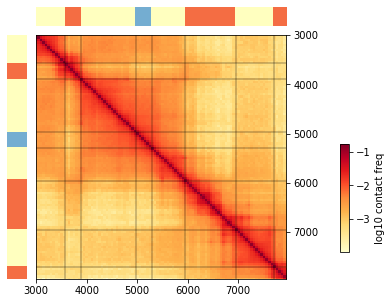

In [69]:
hmm_track = pd.read_csv('../annotations/GM12878_hg38_10kb.tsv', sep='\t')
cooler_file = '/pollard/data/wynton/consortia/4DN/rao2014/GM12878/4DNFIXP4QG5B.mcool'
resolution = 50000
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

annotation_type = 'HMM3'
region1 = 'chr1:3,000,000-8,000,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, hmm_track, region1, region2, annotation_type)
if saveFigs:
    plt.savefig(figure_path+'GM12878_hicseg_'+region1.replace(',','')+'_'+
                region2.replace(',','')+annotation_type+'.svg',
                bbox_inches="tight")

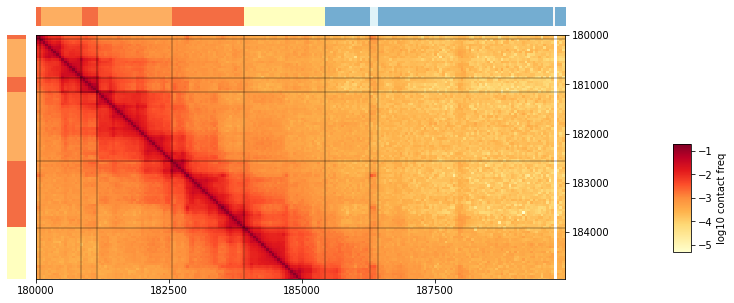

In [73]:
hmm_track = pd.read_csv('../annotations/GM12878_hg38_25kb.tsv', sep='\t')
cooler_file = '/pollard/data/wynton/consortia/4DN/rao2014/GM12878/4DNFIXP4QG5B.mcool'
resolution = 50000
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

annotation_type = 'HMM3P'
region1 = 'chr1:180,000,000-190,000,000'
region2 = 'chr1:180,000,000-185,000,000'
fig = HMMC.plotmap(hic_cooler, hmm_track, region1, region2, annotation_type)
if saveFigs:
    plt.savefig(figure_path+'GM12878_hicseg_'+region1.replace(',','')+'_'+
                region2.replace(',','')+annotation_type+'.svg',
                bbox_inches="tight")

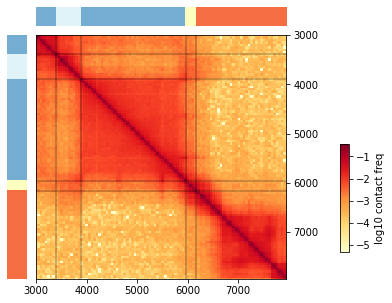

In [30]:
hmm_track = pd.read_csv('../annotations/IMR90_hg38_25kb.tsv', sep='\t')
cooler_file = '/pollard/data/wynton/consortia/4DN/rao2014/IMR90/4DNFIJTOIGOI.mcool'
resolution = 50000
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

annotation_type = 'HMM3P'
region1 = 'chr1:3,000,000-8,000,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, hmm_track, region1, region2, annotation_type)
if saveFigs:
    plt.savefig(figure_path+'IMR90_hicseg_'+region1.replace(',','')+'_'+
                region2.replace(',','')+annotation_type+'.svg',
                bbox_inches="tight")

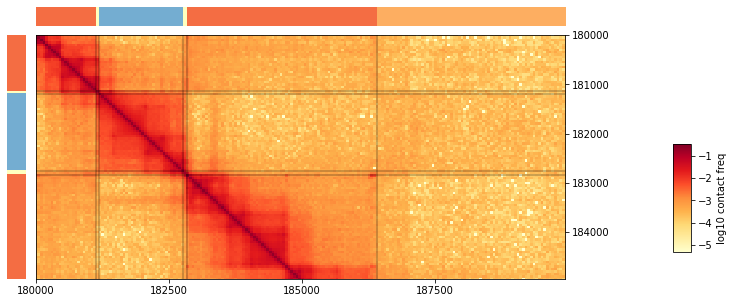

In [31]:
hmm_track = pd.read_csv('../annotations/IMR90_hg38_25kb.tsv', sep='\t')
cooler_file = '/pollard/data/wynton/consortia/4DN/rao2014/IMR90/4DNFIJTOIGOI.mcool'
resolution = 50000
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

annotation_type = 'HMM3P'
region1 = 'chr1:180,000,000-190,000,000'
region2 = 'chr1:180,000,000-185,000,000'
fig = HMMC.plotmap(hic_cooler, hmm_track, region1, region2, annotation_type)
if saveFigs:
    plt.savefig(figure_path+'IMR90_hicseg_'+region1.replace(',','')+'_'+
                region2.replace(',','')+annotation_type+'.svg',
                bbox_inches="tight")